### Zadanie 1

In [25]:
import re
import os
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Najpierw napiszemy funkcje wczytującą plik tekstowy :

In [26]:
path_to_text_file = f'../Documents/BigData/Szekspir/hamlet.txt'
path_to_stopwords_file = f'../Documents/BigData/stop_words_english.txt'

In [27]:
def read_text_file(path_to_text_file):
    file_contents = f''
    with open(path_to_text_file, encoding='utf-8') as f:
        file_contents = f.read()
    
    return file_contents

Poniżej znajduje się funkcja wczytująca plik z listą "stop-words" i tworząca listę tych słów:

In [28]:
def read_stop_words_list(path_to_stopwords_file):
    stop_words_list = []
    
    with open(path_to_stopwords_file, encoding='utf-8') as f:
        stop_words_list = [line.strip() for line in f.readlines()]
        
    return stop_words_list

Testy napisanych funkcji:

In [29]:
txt_file_contents = read_text_file(path_to_text_file)

In [30]:
print(txt_file_contents)

Hamlet
by William Shakespeare
Edited by Barbara A. Mowat and Paul Werstine
  with Michael Poston and Rebecca Niles
Folger Shakespeare Library
https://shakespeare.folger.edu/shakespeares-works/hamlet/
Created on Jul 31, 2015, from FDT version 0.9.2

Characters in the Play
THE GHOST
HAMLET, Prince of Denmark, son of the late King Hamlet and Queen Gertrude
QUEEN GERTRUDE, widow of King Hamlet, now married to Claudius
KING CLAUDIUS, brother to the late King Hamlet
OPHELIA
LAERTES, her brother
POLONIUS, father of Ophelia and Laertes, councillor to King Claudius
REYNALDO, servant to Polonius
HORATIO, Hamlet's friend and confidant
Courtiers at the Danish court:
  VOLTEMAND
  CORNELIUS
  ROSENCRANTZ
  GUILDENSTERN
  OSRIC
  Gentlemen
  A Lord
Danish soldiers:
  FRANCISCO
  BARNARDO
  MARCELLUS
FORTINBRAS, Prince of Norway
A Captain in Fortinbras's army
Ambassadors to Denmark from England
Players who take the roles of Prologue, Player King, Player Queen, and Lucianus in <title>The Murder of Gon

In [31]:
stop_words_list = read_stop_words_list(path_to_stopwords_file)

In [32]:
print(stop_words_list)

['able', 'about', 'above', 'abroad', 'according', 'accordingly', 'across', 'actually', 'adj', 'after', 'afterwards', 'again', 'against', 'ago', 'ahead', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', "a's", 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'back', 'backward', 'backwards', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'came', 'can', 'cannot', 'cant', "can't", 'caption', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', "c'mon", 'co', 'co.', 'com', 'co

Zmienimy wszystkie litery w wejściowym napisie na małe:

In [33]:
def change_to_lowercase(text_file_contents):
    return text_file_contents.lower()

In [34]:
txt_file_contents = change_to_lowercase(txt_file_contents)
print(txt_file_contents)

hamlet
by william shakespeare
edited by barbara a. mowat and paul werstine
  with michael poston and rebecca niles
folger shakespeare library
https://shakespeare.folger.edu/shakespeares-works/hamlet/
created on jul 31, 2015, from fdt version 0.9.2

characters in the play
the ghost
hamlet, prince of denmark, son of the late king hamlet and queen gertrude
queen gertrude, widow of king hamlet, now married to claudius
king claudius, brother to the late king hamlet
ophelia
laertes, her brother
polonius, father of ophelia and laertes, councillor to king claudius
reynaldo, servant to polonius
horatio, hamlet's friend and confidant
courtiers at the danish court:
  voltemand
  cornelius
  rosencrantz
  guildenstern
  osric
  gentlemen
  a lord
danish soldiers:
  francisco
  barnardo
  marcellus
fortinbras, prince of norway
a captain in fortinbras's army
ambassadors to denmark from england
players who take the roles of prologue, player king, player queen, and lucianus in <title>the murder of gon

Następnie należy oczyścić otrzymaną zawartość pliku ze znaków interpunkcyjnych, nadmiarowych białych znaków itd. :

In [35]:
def clean_up_contents(file_contents):
    file_contents = re.sub("[^a-z0-9]+", " ", file_contents)
    file_contents = re.sub("[\s]+", " ", file_contents)
    
    return file_contents

Test napisanej funkcji:

In [36]:
cleaned_file_contents = clean_up_contents(txt_file_contents)
print(cleaned_file_contents)

hamlet by william shakespeare edited by barbara a mowat and paul werstine with michael poston and rebecca niles folger shakespeare library https shakespeare folger edu shakespeares works hamlet created on jul 31 2015 from fdt version 0 9 2 characters in the play the ghost hamlet prince of denmark son of the late king hamlet and queen gertrude queen gertrude widow of king hamlet now married to claudius king claudius brother to the late king hamlet ophelia laertes her brother polonius father of ophelia and laertes councillor to king claudius reynaldo servant to polonius horatio hamlet s friend and confidant courtiers at the danish court voltemand cornelius rosencrantz guildenstern osric gentlemen a lord danish soldiers francisco barnardo marcellus fortinbras prince of norway a captain in fortinbras s army ambassadors to denmark from england players who take the roles of prologue player king player queen and lucianus in title the murder of gonzago title two messengers sailors gravedigger 

Przerabiamy napis na liste:

In [37]:
words_list = cleaned_file_contents.split()

In [38]:
print(words_list)

['hamlet', 'by', 'william', 'shakespeare', 'edited', 'by', 'barbara', 'a', 'mowat', 'and', 'paul', 'werstine', 'with', 'michael', 'poston', 'and', 'rebecca', 'niles', 'folger', 'shakespeare', 'library', 'https', 'shakespeare', 'folger', 'edu', 'shakespeares', 'works', 'hamlet', 'created', 'on', 'jul', '31', '2015', 'from', 'fdt', 'version', '0', '9', '2', 'characters', 'in', 'the', 'play', 'the', 'ghost', 'hamlet', 'prince', 'of', 'denmark', 'son', 'of', 'the', 'late', 'king', 'hamlet', 'and', 'queen', 'gertrude', 'queen', 'gertrude', 'widow', 'of', 'king', 'hamlet', 'now', 'married', 'to', 'claudius', 'king', 'claudius', 'brother', 'to', 'the', 'late', 'king', 'hamlet', 'ophelia', 'laertes', 'her', 'brother', 'polonius', 'father', 'of', 'ophelia', 'and', 'laertes', 'councillor', 'to', 'king', 'claudius', 'reynaldo', 'servant', 'to', 'polonius', 'horatio', 'hamlet', 's', 'friend', 'and', 'confidant', 'courtiers', 'at', 'the', 'danish', 'court', 'voltemand', 'cornelius', 'rosencrantz', 

Usuwany "stop-words":

In [39]:
words_list = [word for word in words_list if word not in stop_words_list]

In [40]:
print(words_list)

['hamlet', 'william', 'shakespeare', 'edited', 'barbara', 'mowat', 'paul', 'werstine', 'michael', 'poston', 'rebecca', 'niles', 'folger', 'shakespeare', 'library', 'https', 'shakespeare', 'folger', 'shakespeares', 'works', 'hamlet', 'created', 'jul', '31', '2015', 'fdt', 'version', '0', '9', '2', 'characters', 'play', 'ghost', 'hamlet', 'prince', 'denmark', 'son', 'late', 'king', 'hamlet', 'queen', 'gertrude', 'queen', 'gertrude', 'widow', 'king', 'hamlet', 'married', 'claudius', 'king', 'claudius', 'brother', 'late', 'king', 'hamlet', 'ophelia', 'laertes', 'brother', 'polonius', 'father', 'ophelia', 'laertes', 'councillor', 'king', 'claudius', 'reynaldo', 'servant', 'polonius', 'horatio', 'hamlet', 'friend', 'confidant', 'courtiers', 'danish', 'court', 'voltemand', 'cornelius', 'rosencrantz', 'guildenstern', 'osric', 'gentlemen', 'lord', 'danish', 'soldiers', 'francisco', 'barnardo', 'marcellus', 'fortinbras', 'prince', 'norway', 'captain', 'fortinbras', 'army', 'ambassadors', 'denmar

Teraz usuniemy słowa o długości $\leq 2$:

In [41]:
words_list = [word for word in words_list if len(word) > 2]

In [42]:
print(words_list)

['hamlet', 'william', 'shakespeare', 'edited', 'barbara', 'mowat', 'paul', 'werstine', 'michael', 'poston', 'rebecca', 'niles', 'folger', 'shakespeare', 'library', 'https', 'shakespeare', 'folger', 'shakespeares', 'works', 'hamlet', 'created', 'jul', '2015', 'fdt', 'version', 'characters', 'play', 'ghost', 'hamlet', 'prince', 'denmark', 'son', 'late', 'king', 'hamlet', 'queen', 'gertrude', 'queen', 'gertrude', 'widow', 'king', 'hamlet', 'married', 'claudius', 'king', 'claudius', 'brother', 'late', 'king', 'hamlet', 'ophelia', 'laertes', 'brother', 'polonius', 'father', 'ophelia', 'laertes', 'councillor', 'king', 'claudius', 'reynaldo', 'servant', 'polonius', 'horatio', 'hamlet', 'friend', 'confidant', 'courtiers', 'danish', 'court', 'voltemand', 'cornelius', 'rosencrantz', 'guildenstern', 'osric', 'gentlemen', 'lord', 'danish', 'soldiers', 'francisco', 'barnardo', 'marcellus', 'fortinbras', 'prince', 'norway', 'captain', 'fortinbras', 'army', 'ambassadors', 'denmark', 'england', 'playe

Teraz napiszemy funkcje do obliczania częstotliwości występowania słów w tekście:

In [43]:
def count_occurences_in_text(words_list):
    words_occurences = dict()
    
    for w in words_list:
        
        if w in words_occurences.keys():
            words_occurences[w] += 1
        else:
            words_occurences[w] = 1
            
    return words_occurences

In [44]:
wo = count_occurences_in_text(words_list)
print(wo)

{'hamlet': 480, 'william': 1, 'shakespeare': 3, 'edited': 1, 'barbara': 1, 'mowat': 1, 'paul': 1, 'werstine': 1, 'michael': 1, 'poston': 1, 'rebecca': 1, 'niles': 1, 'folger': 2, 'library': 1, 'https': 1, 'shakespeares': 1, 'works': 2, 'created': 1, 'jul': 1, '2015': 1, 'fdt': 1, 'version': 1, 'characters': 1, 'play': 40, 'ghost': 33, 'prince': 5, 'denmark': 25, 'son': 23, 'late': 12, 'king': 207, 'queen': 123, 'gertrude': 16, 'widow': 2, 'married': 4, 'claudius': 6, 'brother': 17, 'ophelia': 89, 'laertes': 111, 'polonius': 119, 'father': 71, 'councillor': 1, 'reynaldo': 19, 'servant': 2, 'horatio': 161, 'friend': 14, 'confidant': 1, 'courtiers': 2, 'danish': 7, 'court': 7, 'voltemand': 9, 'cornelius': 7, 'rosencrantz': 75, 'guildenstern': 58, 'osric': 36, 'gentlemen': 14, 'lord': 226, 'soldiers': 6, 'francisco': 12, 'barnardo': 29, 'marcellus': 44, 'fortinbras': 22, 'norway': 13, 'captain': 10, 'army': 3, 'ambassadors': 6, 'england': 22, 'players': 23, 'roles': 1, 'prologue': 7, 'play

In [45]:
def transform_occurences_dict_into_list(occurences_dict, number_of_words):
    words_occurences_list = [(k, v) for k, v in occurences_dict.items()]
    
    words_occurences_list.sort(reverse=True, key=lambda x: x[1])
    
    return words_occurences_list[0:number_of_words]

In [46]:
words_occurences_list = transform_occurences_dict_into_list(wo, 100)
print(words_occurences_list)

[('hamlet', 480), ('lord', 226), ('king', 207), ('horatio', 161), ('queen', 123), ('polonius', 119), ('laertes', 111), ('good', 108), ('ophelia', 89), ('thy', 87), ('sir', 77), ('rosencrantz', 75), ('enter', 73), ('tis', 73), ('father', 71), ('love', 69), ('hath', 65), ('speak', 64), ('man', 60), ('thee', 59), ('guildenstern', 58), ('heaven', 46), ('time', 46), ('mother', 45), ('marcellus', 44), ('play', 40), ('exits', 38), ('gravedigger', 37), ('night', 37), ('exit', 37), ('osric', 36), ('death', 36), ('god', 35), ('soul', 35), ('life', 34), ('ghost', 33), ('hear', 33), ('hold', 32), ('dead', 31), ('heart', 30), ('barnardo', 29), ('pray', 29), ('dear', 29), ('nature', 29), ('leave', 29), ('doth', 27), ('matter', 27), ('great', 26), ('denmark', 25), ('player', 25), ('sweet', 25), ('true', 24), ('head', 24), ('earth', 24), ('son', 23), ('players', 23), ('scene', 23), ('eyes', 23), ('fortinbras', 22), ('england', 22), ('fear', 22), ('set', 22), ('madness', 22), ('mad', 22), ('fair', 21),

Funkcja pomocnicza do utworzenia pliku csv:

In [47]:
def write_to_csv(occurences_list, csv_file_path):
    with open(csv_file_path, 'a', encoding='utf-8') as f:
        for pair in occurences_list:
            file_line = f'{pair[1]};{pair[0]}\n'
            
            f.write(file_line)
    
    print(f'Done !')

In [53]:
write_to_csv(words_occurences_list, f'Documents/hamlet.csv')

Done !


Utworzona chmura słów dla $100$ najczęściej występujących słów w pliku *hamlet.txt*.

### Zadanie 2

Funkcja obliczająca częstość występowania słów we wszystkich dokumentach w korpusie:

In [48]:
def create_corpus_words_dictionary(path_to_corpus, stop_words_list):
    documents_words_lists = dict()
    
    files_list = [str(path.name) for path in os.scandir(path_to_corpus) if path.is_file()]
    
    for file in files_list:
        file_path = f'{path_to_corpus}/{file}'
        
        file_contents = read_text_file(file_path)
        
        file_contents = change_to_lowercase(file_contents)
        
        file_contents = clean_up_contents(file_contents)
        
        words_list = file_contents.split()
        
        words_list = [word for word in words_list if word not in stop_words_list]
        
        words_list = [word for word in words_list if len(word) > 2]
        
        wo = count_occurences_in_text(words_list)
        
        documents_words_lists[file] = wo
    
    return documents_words_lists

In [50]:
corpus_words_dictionary = create_corpus_words_dictionary(f'../Documents/BigData/Szekspir', stop_words_list)

In [51]:
print(corpus_words_dictionary['hamlet.txt'])

{'hamlet': 480, 'william': 1, 'shakespeare': 3, 'edited': 1, 'barbara': 1, 'mowat': 1, 'paul': 1, 'werstine': 1, 'michael': 1, 'poston': 1, 'rebecca': 1, 'niles': 1, 'folger': 2, 'library': 1, 'https': 1, 'shakespeares': 1, 'works': 2, 'created': 1, 'jul': 1, '2015': 1, 'fdt': 1, 'version': 1, 'characters': 1, 'play': 40, 'ghost': 33, 'prince': 5, 'denmark': 25, 'son': 23, 'late': 12, 'king': 207, 'queen': 123, 'gertrude': 16, 'widow': 2, 'married': 4, 'claudius': 6, 'brother': 17, 'ophelia': 89, 'laertes': 111, 'polonius': 119, 'father': 71, 'councillor': 1, 'reynaldo': 19, 'servant': 2, 'horatio': 161, 'friend': 14, 'confidant': 1, 'courtiers': 2, 'danish': 7, 'court': 7, 'voltemand': 9, 'cornelius': 7, 'rosencrantz': 75, 'guildenstern': 58, 'osric': 36, 'gentlemen': 14, 'lord': 226, 'soldiers': 6, 'francisco': 12, 'barnardo': 29, 'marcellus': 44, 'fortinbras': 22, 'norway': 13, 'captain': 10, 'army': 3, 'ambassadors': 6, 'england': 22, 'players': 23, 'roles': 1, 'prologue': 7, 'play

Funkcja tworząca liste wszystkich słów występujących w całym korpusie:

In [52]:
def create_corpus_words_list(documents_words):
    files_list = documents_words.keys()
        
    return list({word for file in files_list for word in documents_words[file].keys()})

In [53]:
corpus_words_list = create_corpus_words_list(corpus_words_dictionary)

In [54]:
print(corpus_words_list)

['evidence', 'preparations', 'tripp', 'affordeth', 'sixth', 'needly', 'essence', 'formal', 'vanish', 'machination', 'litter', 'counselor', 'ashes', 'hair', 'dangers', 'crust', 'tales', 'drops', 'snatching', 'conjunctive', 'offensive', 'absent', 'unpeg', 'torments', 'highly', 'ratifiers', 'wail', 'snuff', 'rant', 'healthsome', 'ingenious', 'touch', 'request', 'twinkled', 'dine', 'romeo', 'blooded', 'undertaker', 'adversity', 'pated', 'eager', 'universal', 'sulphur', 'shook', 'stoup', 'housewifery', 'fierce', 'honour', 'roasted', 'drop', 'lazy', 'dignity', 'dominance', 'trust', 'concealed', 'daily', 'push', 'ballow', 'chidden', 'daughters', 'suffering', 'flower', 'rightly', 'impatience', 'seduce', 'conveniences', 'skains', 'remedy', 'pester', 'double', 'monday', 'neutral', 'eruption', 'revengeful', 'enact', 'chid', 'wheaten', 'declin', 'trade', 'dedicate', 'neighbour', 'suns', 'curan', 'array', 'chance', 'hypocrisy', 'den', 'commercial', 'alehouse', 'stoops', 'conjure', 'persecutions', '

Funkcja do obliczania **TF-IDF**:

In [62]:
def compute_tf_idf(word, document, documents_words_dict):
    if word not in documents_words_dict[document].keys():
        occurences = 0
    else:
        occurences = documents_words_dict[document][word] / sum(documents_words_dict[document].values())
        
    overall_in_corpus_occurences = len([1 for d in documents_words_dict.keys() if word in documents_words_dict[d].keys()])
    
    return occurences*math.log2(len(documents_words_dict.keys()) / overall_in_corpus_occurences)

Funkcja do obliczania wag **TF-IDF** dla wszystkich słów w korpusie:

In [56]:
def compute_tf_idf_corpus_weights(corpus_words_list, documents_words_dict):
    documents_tf_idf_dict = dict()
    
    documents = list(documents_words_dict.keys())
    
    for d in documents:
        documents_tf_idf_dict[d] = dict()
        
        for w in corpus_words_list:
            word_tf_idf_weight = compute_tf_idf(w, d, documents_words_dict)
            
            documents_tf_idf_dict[d][w] = word_tf_idf_weight
            
    return documents_tf_idf_dict

In [57]:
tf_idf_corpus_weights = compute_tf_idf_corpus_weights(corpus_words_list, corpus_words_dictionary)

In [58]:
print(tf_idf_corpus_weights)

{'RomeoJuliet.txt': {'evidence': 0.0, 'preparations': 0.0, 'tripp': 0.0, 'affordeth': 0.0, 'sixth': 0.0, 'needly': 0.00018269845619804512, 'essence': 0.0, 'formal': 0.0, 'vanish': 9.134922809902256e-05, 'machination': 0.0, 'litter': 0.0, 'counselor': 0.0, 'ashes': 0.00036539691239609025, 'hair': 0.0, 'dangers': 0.0, 'crust': 0.0, 'tales': 0.0, 'drops': 0.0, 'snatching': 0.0, 'conjunctive': 0.0, 'offensive': 0.0, 'absent': 0.0, 'unpeg': 0.0, 'torments': 9.134922809902256e-05, 'highly': 0.0, 'ratifiers': 0.0, 'wail': 9.134922809902256e-05, 'snuff': 0.0, 'rant': 0.0, 'healthsome': 0.00018269845619804512, 'ingenious': 0.0, 'touch': 0.0, 'request': 3.791335519127101e-05, 'twinkled': 0.0, 'dine': 9.134922809902256e-05, 'romeo': 0.02850095916689504, 'blooded': 0.0, 'undertaker': 0.0, 'adversity': 0.00018269845619804512, 'pated': 0.0, 'eager': 0.0, 'universal': 0.00018269845619804512, 'sulphur': 0.0, 'shook': 0.0, 'stoup': 0.0, 'housewifery': 0.0, 'fierce': 9.134922809902256e-05, 'honour': 0.0

Poniżej znajduje się funkcja do tworzenia chmury słów dla wybranego dokumentu w korpusie:

In [59]:
def create_word_cloud_for_document(destination_directory, document_name, tf_idf_corpus_weights):
    pairs = [(k, v) for k, v in tf_idf_corpus_weights[document_name].items()]
    
    pairs.sort(reverse=True, key=lambda x: x[1])
    
    pairs = dict(pairs)
    
    word_cloud = WordCloud(width=500, height=400, mode='RGBA', background_color='white', max_words=100).fit_words(pairs)
    
    document_name = document_name.split('.')[0]
    
    plt.figure()
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(f'{destination_directory}/{document_name}_wordcloud.png')

Następnie utworzymy chmurę słów dla każdego tekstu (dramatu) w korpusie:

File name: RomeoJuliet.txt
File name: Othello.txt
File name: hamlet.txt
File name: KingLear.txt


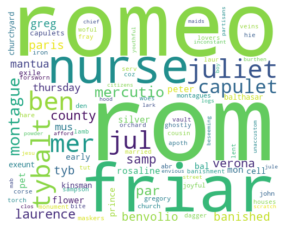

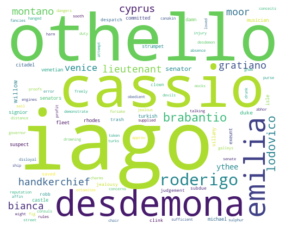

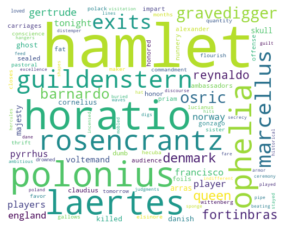

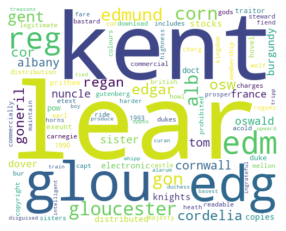

In [61]:
corpus_directory = f'../Documents/BigData/Szekspir'
dest_dir = f'../Documents/BigData'

file_names = [str(path.name) for path in os.scandir(corpus_directory) if path.is_file()]

for f in file_names:
    print(f'File name: {f}')
    create_word_cloud_for_document(dest_dir, f, tf_idf_corpus_weights)